In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score,calinski_harabasz_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA

In [3]:

# Carregando os dados
treino = pd.read_csv('data/train.csv')
teste = pd.read_csv('data/test.csv')
treino.drop(columns=['Survived'],inplace=True)
treino = pd.concat([treino,teste],axis=0)

In [4]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [5]:
treino.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [6]:
treino.fillna({'Age': treino['Age'].median(), 'Embarked': treino['Embarked'].mode()[0],'Fare':treino['Fare'].mean()}, inplace=True)

In [7]:
treino.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,29.503186,0.498854,0.385027,33.295479
std,378.020061,0.837836,12.905241,1.041658,0.865560,51.738879
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [8]:
treino.Age.median()

28.0

In [9]:
colunas_para_remover = ['Name', 'Ticket', 'Cabin', 'Embarked','PassengerId']
treino.drop(colunas_para_remover, axis=1, inplace=True)

In [10]:
# Convertendo as variáveis categóricas (valide essa parte)
labelEncoder = LabelEncoder()
treino['Sex'] = labelEncoder.fit_transform(treino['Sex'])

In [11]:
# Normalizando os dados
scaler = MinMaxScaler()
X = scaler.fit_transform(treino)

In [13]:
treino.isna().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

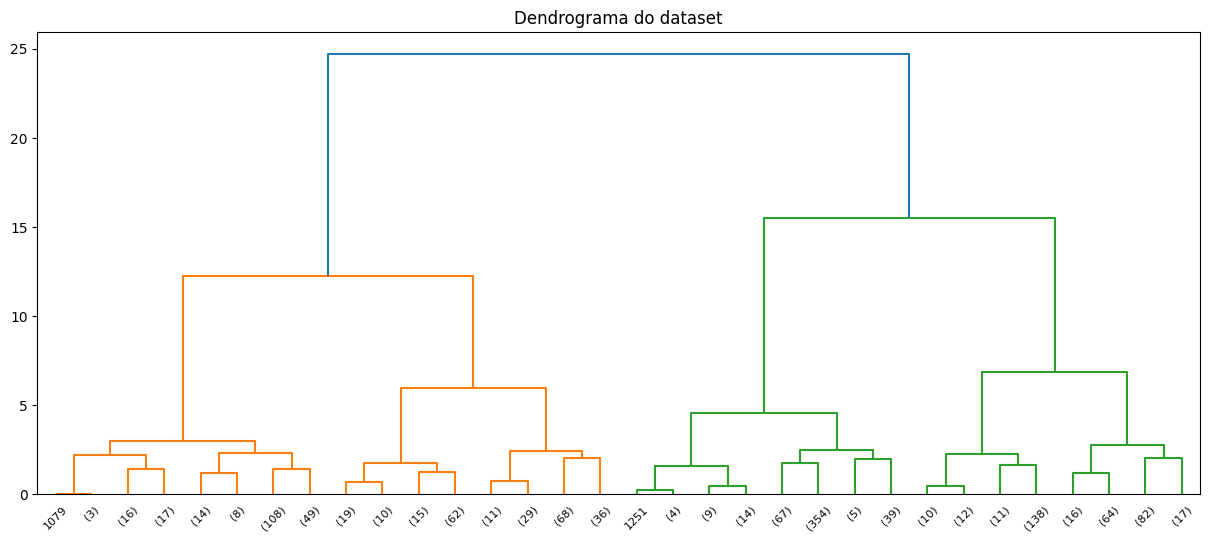

In [54]:
from scipy.cluster.hierarchy import dendrogram, linkage,ward

#linkage realiza clusterização hierárquica a fim de se construir um dendrograma
fig,ax = plt.subplots(figsize=(15,6))
dendrogram(linkage(X,method='ward'),truncate_mode='level', p=4)
plt.title("Dendrograma do dataset")
plt.show()

In [15]:
pca = PCA(n_components=2)
X_pca =pca.fit_transform(X)


In [16]:
Z=linkage(X_pca,method='ward')
Z.shape

(1308, 4)

In [84]:
from scipy.cluster.hierarchy import fcluster

# Suponha que você queira formar 4 clusters
clusters = fcluster(Z, 6, criterion='maxclust')

# Calcule o índice de silhueta
silhouette_avg = silhouette_score(X, clusters)
print(f'Índice de Silhueta Médio: {silhouette_avg}')


Índice de Silhueta Médio: 0.5724040947304644


In [18]:
pd.unique(clusters)

array([3, 2, 1, 4])

In [75]:
davies_bouldin = davies_bouldin_score(X, clusters)
print("Índice de Davies-Bouldin:", davies_bouldin)

Índice de Davies-Bouldin: 0.89506701282318


In [85]:
calinski_harabasz_score(X, clusters)

2016.8192537846974

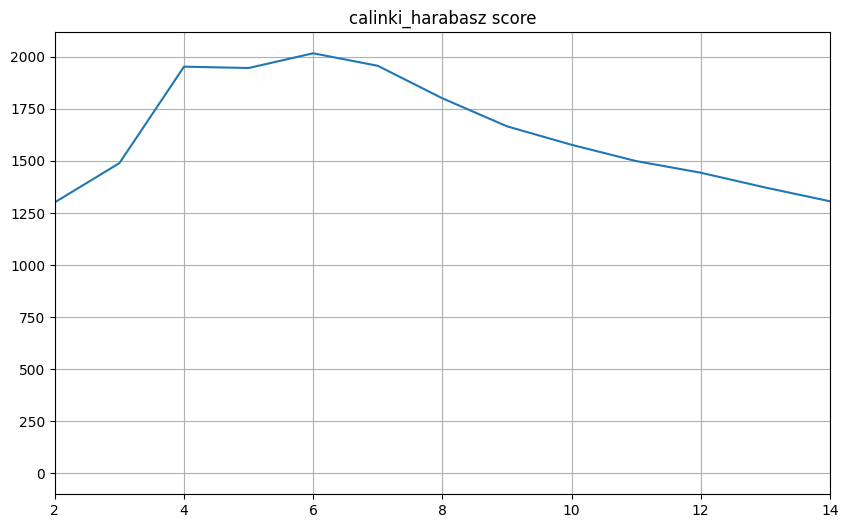

In [90]:
max_cluster = 15
cluster_calinski_series = [0 for i in range(max_cluster)]
for i in range(2,max_cluster):
    # Suponha que você queira formar 4 clusters
    clusters = fcluster(Z, i, criterion='maxclust')
    CH_index = calinski_harabasz_score(X, clusters)
    cluster_calinski_series[i]=(CH_index)
fig,ax = plt.subplots(figsize=(10,6))
plt.plot(cluster_calinski_series)
plt.xlim(2,14)
ax.grid()
plt.title("calinki_harabasz score")
plt.show()

In [77]:
len(cluster_calinski_series)

13

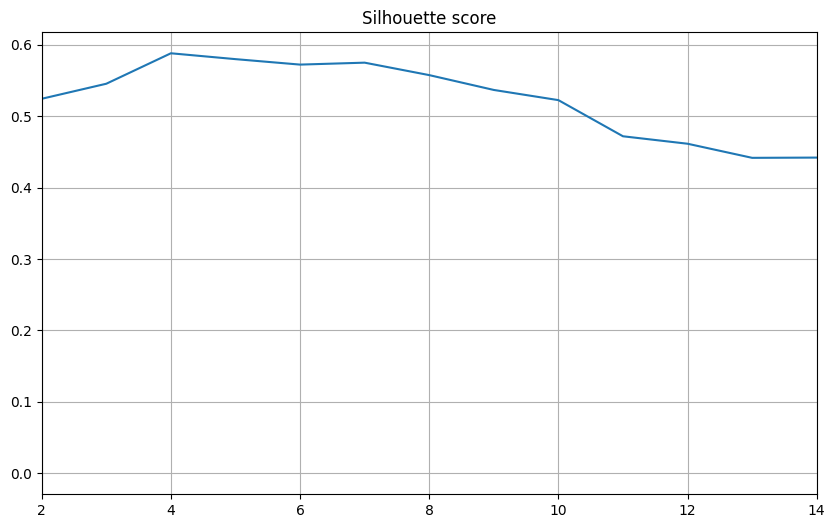

In [89]:
max_cluster = 15
cluster_silhouette_series = [0 for i in range(max_cluster)]
for i in range(2,max_cluster):
    # Suponha que você queira formar 4 clusters
    clusters = fcluster(Z, i, criterion='maxclust')
    shi_score = silhouette_score(X, clusters)
    cluster_silhouette_series[i] = (shi_score)
fig,ax = plt.subplots(figsize=(10,6))
plt.plot(cluster_silhouette_series)
plt.xlim(2,14)
ax.grid()
plt.title("Silhouette score")
plt.show()

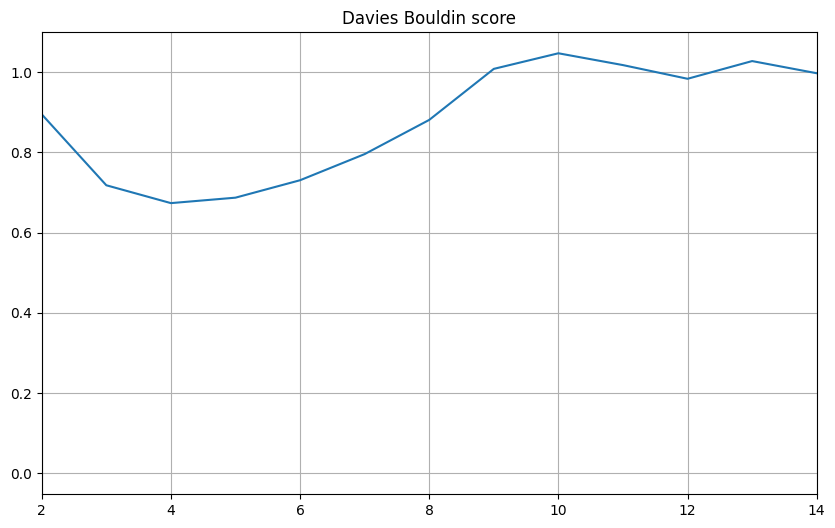

In [88]:
max_cluster = 15
cluster_davies_series = [0 for i in range(max_cluster)]
for i in range(2,max_cluster):
    # Suponha que você queira formar 4 clusters
    clusters = fcluster(Z, i, criterion='maxclust')
    davies_score = davies_bouldin_score(X, clusters)
    cluster_davies_series[i]=(davies_score)
fig,ax = plt.subplots(figsize=(10,6))
plt.xlim(2,14)
plt.plot(cluster_davies_series)
ax.grid()
plt.title("Davies Bouldin score")
plt.show()

In [103]:
clusters = fcluster(Z, 4, criterion='maxclust')

In [107]:
X_df = pd.DataFrame(X,columns=treino.columns)
X_df['Cluster'] = clusters
X_df.loc[X_df.Cluster==2]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cluster
1,0.0,0.0,0.473882,0.125,0.000000,0.139136,2
3,0.0,0.0,0.436302,0.125,0.000000,0.103644,2
9,0.5,0.0,0.173243,0.125,0.000000,0.058694,2
11,0.0,0.0,0.724414,0.000,0.000000,0.051822,2
15,0.5,0.0,0.686835,0.000,0.000000,0.031230,2
...,...,...,...,...,...,...,...
1288,0.0,0.0,0.599148,0.125,0.111111,0.154588,2
1291,0.0,0.0,0.373669,0.000,0.000000,0.321798,2
1293,0.0,0.0,0.273456,0.000,0.111111,0.115941,2
1302,0.0,0.0,0.461355,0.125,0.000000,0.175668,2


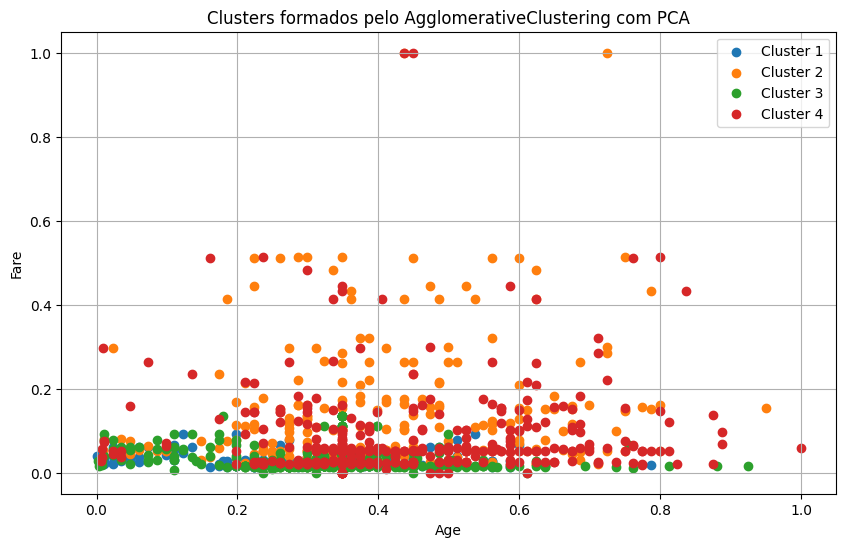

In [111]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(1,5):
    X_pca_cluster = X_df.loc[X_df.Cluster==i]
    ax.scatter(X_pca_cluster["Age"],X_pca_cluster["Fare"],label=f"Cluster {i}")
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Clusters formados pelo AgglomerativeClustering com PCA')
ax.legend(loc="upper right")
ax.grid()
plt.show()

In [25]:
X_pca_df = pd.DataFrame(X_pca,columns=["componente 1","componente 2"])
X_pca_df["Cluster"] = clusters

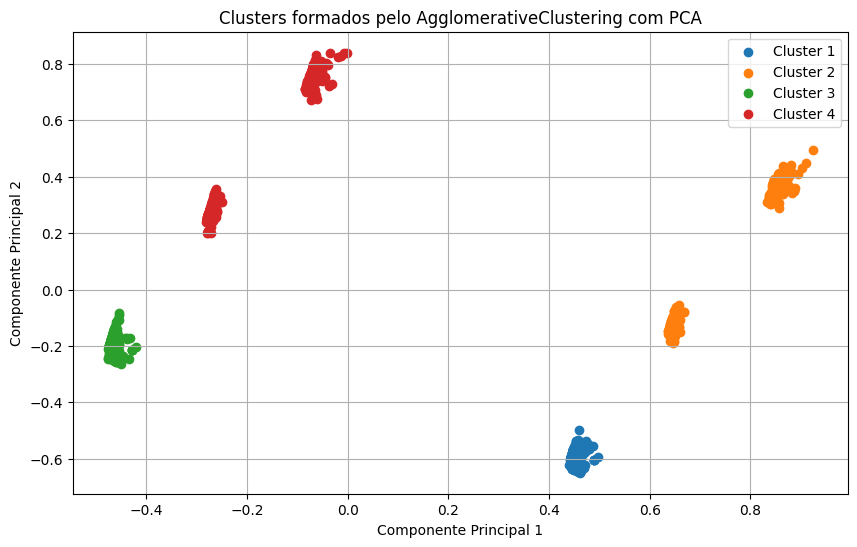

In [112]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(1,5):
    X_pca_cluster = X_pca_df.loc[X_pca_df.Cluster==i]
    ax.scatter(X_pca_cluster["componente 1"],X_pca_cluster["componente 2"],label=f"Cluster {i}")
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters formados pelo AgglomerativeClustering com PCA')
ax.legend(loc="upper right")
ax.grid()
plt.show()